# Problem Set 1


## Important information

Please submit the single Jupyter Notebook file, where only Python and Markdown/LaTeX are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

The works will be checked for plagiarism. The score will be divided by the number of similar works.

# Norms and numbers (40 pts)

## Problem 1 (10 pts)

### Problem 1.1 (1 pts)
- (1 pts) For $1 \leq p \leq q \leq \infty$, show that there always exists a constant $C = C(n,p,q) > 0$ such that $\|x\|_p \leq C\|x\|_q$ for every $x \in \mathbb{R}^n$

Solution:

### Problem 1.2 (4 pts)

For any norm $\|\cdot\|$ in finite dimentional space $\mathbb{C}^{N}$ we define dual norm $\|x\|^{'} = \sup\left\{\left|y^{\star} x\right|:\left\|y\right\|=1\right\}$, where ${\cdot}^{\star}$ denotes transpose complex-conjugate vector.
+ (2 pts). Prove that $\|\cdot\|^{'}$ is a norm.
+ (2 pts). Find dual norm for $l_p$ norm

Solution:

### Problem 1.3 (5 pts)

Suppose $f(x)$ is a differentiable function receiving a vector input $x = [x_i]_{i=1}^d$ and returning a scalar. Then object $\nabla_{x} f(x) = [\frac{d}{dx_i}f(x)]_{i=1}^d$ is called gradient.

Find gradient $\nabla_{x} f(x)$ for:
- (1 pts) $f(x) = (a, x)$
- (1 pts) $f(x) = Ax - b$
- (1 pts) $f(x) = \|x\|_2^2$
- (1 pts) $f(x) = \|x\|_2$
- (1 pts) $f(x) = \log_e(1 + \exp((a, x)))$

Solution:

## Problem 2 (4 pts)

For this section one should provide full solution processes. Simple numerical answers would not be graded.

### Problem 2.1 (1 pts)
Convert the given fixed point number in form of a binary string to a decimal scalar value. The integer part is 10 bits and the fractial part is 5 bits.
$$1101010100101111$$

Solution:

### Problem 2.2 (1 pts)
Convert the given floating point number in form of a binary string to a decimal scalar value. The exponent part is 5 bits and the mantissa part is 8 bits.
$$10100101101011$$

Solution:

### Problem 2.3 (1 pts)
Find an angle between two vectors $x = [8, 4, 1, 2]$ and $y = [2, -2, 1, 0]$.

Solution:

### Problem 2.4 (1 pts)
For the given vector-to-scalar function $f(x) = c_1(x, x) + c_2(a, x) + c_3$, where $c_1 = 4, c_2 = 3, c_3 = 8$ and $a = [4, 2, -3, 4]$, find the corresponding gradient $\nabla_x f(x)$ in a specific point $x = [-1, 6, 2, 0]$.

Solution:

## Problem 3 (26 pts)

### K-Nearest Neighbours for binary classification (26 pts)

In this task, you will implement a simple version of the K-Nearest Neighbours (KNN) classifier for binary classification. You will explore different distance metrics and their connection to vector norms and understand their impact on the performance of the KNN algorithm.

Additionally, you will answer some theoretical questions related to vector norms and their properties.

### 3.1 Dataset Generation (5 pts)
- (3 pts) Generate a synthetic dataset using the `make_blobs` function from `sklearn.datasets`.
- (2 pts) Split the dataset into training and testing sets.

In [ ]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

In [ ]:
# Generate a dataset and split it into train and test sets
N = 2000                # number of samples
dim = 2                 # number of features
centers = 2             # number of classes
cluster_std = 2.0       # standard deviation of the clusters
center_box = (-3, 3)    # range of the clusters
seed = 0xC0FFEE         # random seed for reproducibility
test_size = 0.25        # proportion of the dataset to include in the test split

X, y = # YOUR CODE
X_train, X_test, y_train, y_test = # YOUR CODE

# Plot the training set
plt.figure(figsize=(6, 6))
plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'ro', label='Class 0')
plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bo', label='Class 1')
plt.legend(loc='upper right')
plt.show()

### 3.2 Implement Distance Metrics (9 pts)

KNN uses a chosen distance metric to find the nearest neighbours. We will use following metrics:

- (3 pts) **Manhattan Distance**
- (3 pts) **Euclidean Distance**
- (3 pts) **Cosine Distance**

Implement each one instead of the provided placeholders.

You must use numpy vector and matrix operations - it's strictly forbidden to use any forms of python loops (for, while, etc.). Implementation of each metric must follow respective placeholder description.

In [ ]:
def manhattan_distance(x1, x2):
    '''
    Find the Manhattan distance between two sets of points
        x1 - array of shape (n_samples, n_features) OR single point of shape (n_features)
        x2 - array of shape (n_samples, n_features) OR single point of shape (n_features)

    Returns:
        distance - array of shape (n_samples) OR single value
    '''
    raise NotImplemented()

def euclidean_distance(x1, x2):
    '''
    Find the Eucledian distance between two sets of points
        x1 - array of shape (n_samples, n_features) OR single point of shape (n_features)
        x2 - array of shape (n_samples, n_features) OR single point of shape (n_features)

    Returns:
        distance - array of shape (n_samples) OR single value
    '''
    raise NotImplemented()

def cosine_distance(x1, x2):
    '''
    Find the Cosine distance between two sets of points
        x1 - array of shape (n_samples, n_features) OR single point of shape (n_features)
        x2 - array of shape (n_samples, n_features) OR single point of shape (n_features)

    Returns:
        distance - array of shape (n_samples) OR single value
    '''
    raise NotImplemented()

### 3.3 KNN Classifier (8 pts)

Implement a KNN classifier that can use any of the above distance metrics using provided template. The classifier should have methods for fitting the model to the training data, predicting the class labels for the test data, and finding the K-nearest neighbors.

In [ ]:
class NearestNeighborsFinder:
    def __init__(self, n_neighbors=5, metric="euclidean"):
        self.n_neighbors = n_neighbors

        # choose metric function
        if metric == "euclidean":
            self._metric_func = euclidean_distance
        elif metric == "manhattan":
            self._metric_func = manhattan_distance
        elif metric == "cosine":
            self._metric_func = cosine_distance
        else:
            raise ValueError("Metric is not supported", metric)
        self.metric = metric

    def kneighbors(self, X, return_distance=False):
        '''
        Find the K-neighbors of a point.
            X - array of shape (n_queries, n_features)
            return_distance - if True, return distances to the neighbors

        Returns:
            indices - array of shape (n_queries, n_neighbors)
            distances - array of shape (n_queries, n_neighbors)
        '''

        raise NotImplemented()

    def fit(self, X, y=None):
        '''
        Fit the model using X as training data
            X - array of shape (n_samples, n_features)
            y - array of shape (n_samples)

        Returns:
            self - fitted estimator
        '''
        self._X = X
        self._y = y
        return self

    def predict(self, X):
        neigbours_idx = self.kneighbors(X)
        raise NotImplemented

### 3.4 Evaluation

- (2 pts) Test your estimator. Your implementation should yeild F1-score at least 0.8 for each metric.
- (2 pts) Compare different decision boundaries. What is the difference between them? In which scenario we should use each metric?

In [ ]:
for metric in ["euclidean", "manhattan", "cosine"]:

    # Test your estimator
    estimator = NearestNeighborsFinder(n_neighbors=5, metric=metric)
    score = f1_score(y_test, estimator.fit(X_train, y_train).predict(X_test))
    print(f'F1-score For {metric} metric:', score)

    assert score > 0.80, f"Score for {metric} metric is too low. Check your implementation."

    # Plot the decision boundary
    h = 0.25  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.title(f'Decision boundary for {metric} metric')
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.plot(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 'ro', label='Class 0')
    plt.plot(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 'bo', label='Class 1')
    plt.legend(loc='upper right')
    plt.show()

# Matrix norms (35 pts)

### Problem 1. Frobenius Norm computation (10 pts)

1. Let $U \in \mathbb{R}^{n \times r}$ be an $n \times r$ matrix with orthonormal columns $U^{\top} U = I_r$. Let $V$ be an $m \times r$ matrix.

+ (3 pts). Propose an algorithm for the computation of $\Vert A \Vert^2_F$, where $A = U V^{\top}$, and estimate its complexity with respect to $n, m, r$. How orthogonalization can be used?

+ (3 pts). Consider the matrix $B = A \circ A$, where $\circ$ is the elementwise product of matrices (i.e., the elements of the matrix $B$ are squares of the elements of the matrix $A$). What is the maximal possible rank of the matrix $B$?

+ (5 pts). Propose an algorithm for the computation of $\Vert B \Vert^2_F$ and estimate its complexity with respect to $n, m, r$.

Solution:

### Unitary and orthogonal matrices (15 pts)

+ (3 pts). Let $O\in\mathbb{R}^{n\times n}$ be orthogonal matrix. Characterise explicitly all orthogonal matrices that are positive definite. You may start with $n=2$.

+ (3 pts). Show that any unitary matrix from $\mathbb{C}^{n\times n}$ can be represented as a product of at most $n$ Householder reflectors.

+ (5 pts). Give an example of $M\in\mathbb{R}^{n\times n}$ matrix that preserves $l_\infty$ norm but does not preserve $l_2$ norm; or prove that it is not possible. *Hint: you can try working with basis vectors*

+ (6 pts). Do the same for $l_1$ norm.

Solution:

### Orthogonal matrices (7 pts)

A square $n \times n$ matrix $A$ is said to be in **upper Hessenberg form** if $a_{i,j}=0$ for all $i,j$ with $i > j+1$. Reducing matrix to this form will be useful for optimization of QR algorithm that can be used to get eigenvalues of the matrix.

Now, we can use orthogonal matrices to reduce matrices to upper Hessenberg form. Implement your function that could do that for any $M\in\mathbb{R}^{n\times n}$ using either Householder reflections or Givens rotations.

+ (4 pts) Implement function Hessenberg_Transform which takes a real square matrix and returns transformed matrix in Hessenberg form
+ (3 pts) Varing parameter $n$ generate random matrix of size $n \times n$ and measure the computation time of Hessenberg_Transform function. Plot observed data: computation time versus $n$. Explain obtained results.

In [ ]:
def Hessenberg_Transform(A):
  H = # your solution
  return H

# Random walk for matrix inverse (65 pts)

Our final goal will be to construct a random walk model that can be used to estimate individual elements of matrix inverse. We will need some technical details before we can proceed with the model itself.

## Problem 1: spectral radius (5 pts)

Spectral radius $\rho(A)$ of matrix $A$ is its maximal absolute eigenvalue:
$\rho(A) = \max_i \left|\lambda_i(A)\right|$.

**a.** (2 pts) Show that $\rho(A)\leq \left(\left\|A^{k}\right\|\right)^{\frac{1}{k}}$ holds for arbitrary induced (aka subordinate or operator) norm $\left\|\cdot\right\|$.

**Hint:** use definition of eigenvalue and $\left\|A x\right\| \leq \left\|A\right\| \left\|x\right\|$.

**Solution:**



**b.** (3 pts) Show that if $\rho(A)<1$ matrix $I-A$ is invertible.

**Solution:**



## Problem 2: Neumann series (10 pts)

Neuman series of matrix $A$ is $\sum_{k=0}^{\infty} A^{k}$.

**a.** (3 pts) Suppose Neumann series for matrix $A$ converges. Demonstrate that $\sum_{k=0}^{\infty} A^{k} = (I - A)^{-1}$.

**Solution:**


**b.** (3 pts) Show that if $\rho(A) < 1$ Neumann series converges absolutely, i.e., $\sum_{k=0}^{\infty} \left\|A^{k}\right\| < \infty$ for any operator norm $\left\|\cdot\right\|$.

**Hint:** Use [Gelfand's formula](https://en.wikipedia.org/wiki/Spectral_radius#Gelfand's_formula) to bound a tail of the series above.

**Solution:**



**c.** (4 pts) Show that if Neumann series converges $\rho(A) < 1$.

**Hint:** What if $\rho(A)\geq1$? Can you reduce the problem to the analysis of an ordinaty series (not a matrix one)?

**Solution:**




## Problem 3: random walk (7 pts)

Now we are ready to formulate matrix inversion with random walk. We will need several abstract definitions that will be later related to the inverse of a matrix.

We assume that there are $N+1$ states which we denote $\left\{1, \dots, N\right\} + \left\{T\right\}$ where $T$ is a **t**erminal state. The path (or walk) is a sequence of states that always ends at the terminal state. Two examples of paths are:

1. Path that starts at state $1$ and reaches state $100$ in four steps before termination: $1\rightarrow 5\rightarrow 7\rightarrow 10\rightarrow 100\rightarrow T$
2. Path that starts at state $7$ and reaches state $7$ in two steps before termination: $7\rightarrow 7\rightarrow 7 \rightarrow T$.

To generate paths we suppose that we are equipped with matrix $p_{ij}$ that describes probabilities of transferring from state $i$ to state $j$ and vector $\pi_i$ with probabilities of reaching terminal state $T$ from state $i$. Probabilities are positive and sum to one $\pi_i + \sum_{j}p_{ij} = 1$ for each state $i$. We also assume that the model is Markov, that is $p(i\rightarrow j\rightarrow k) = p(i\rightarrow j) p(j\rightarrow k)$.

For example, consider $4$ states and
$$
 p =
 \begin{pmatrix}
 0.2 & 0 & 0.4 & 0\\
 0 & 0 & 0.4 & 0.5\\
 0.1 & 0.1 & 0.1 & 0.1\\
 0 & 0.3 & 0.2 & 0.2\\
 \end{pmatrix},
 \pi =
 \begin{pmatrix}
 0.4 \\
 0.1 \\
 0.6 \\
 0.3
 \end{pmatrix}.
$$


**a.** (1 pts) Find probability of path $1\rightarrow 1\rightarrow 1\rightarrow 1 \rightarrow T$

**b.** (1 pts) Find probability of path $2 \rightarrow 3 \rightarrow 1 \rightarrow 2 \rightarrow 3 \rightarrow T$

**c.** (2 pts) Find probability that walk start at state $1$, performs three step and terminates at state $1$.

**Hint:** Consider all paths of the form $1\rightarrow \star \rightarrow \star \rightarrow 1 \rightarrow T$.

**d.** (3 pts) Consider an extended matrix

$$
 P =
 \begin{pmatrix}
 0.2 & 0 & 0.4 & 0 & 0.4\\
 0 & 0 & 0.4 & 0.5 & 0.1\\
 0.1 & 0.1 & 0.1 & 0.1 & 0.6\\
 0 & 0.3 & 0.2 & 0.2 & 0.3 \\
 0 & 0 & 0 & 0 & 1
 \end{pmatrix}
$$

This is a [stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) that describes transitions $i\rightarrow j$ and $i\rightarrow T$ simultaneously with $T$ identified as state $5$.

Show that for arbitrary stochastic matrix $P$, $\left(P^{n}\right)_{ij}$ contain probabilities of walks that start at state $i$ and end at state $j$ after $n$ steps.

**Comment 1:** Matrix $P$ is a stochastic matrix if $P_{ij}\geq 0$ and $\sum_{j}P_{ij} = 1$.

**Comment 2:** State $5$ is absorbing, so it is fine to consider walks of the form $1 \rightarrow 2 \rightarrow 5 \rightarrow 5 \rightarrow 5 \rightarrow \dots \rightarrow 5$.

**Comment 3:** You may find it helpful to first consider examples of walks with a small number of steps and matrix $P$.

**Solution:**


## Problem 4: weighted random walk (5 pts)


In the previous problem we considered ordinary random walk. To perform useful computations we will add weights $v_{ij}$ that corresponds to transition from state $i$ to state $j$. The weight of walk $w = s_0 \rightarrow s_1 \rightarrow s_2 \rightarrow \dots \rightarrow s_N \rightarrow T$ is $V(w) = \prod_{i=1}^{N-1} v_{s_i s_{i+1}}$.

Let

$$
  p =
  \begin{pmatrix}
  0.2 & 0 & 0.4 & 0\\
  0 & 0 & 0.4 & 0.5\\
  0.1 & 0.1 & 0.1 & 0.1\\
  0 & 0.3 & 0.2 & 0.2\\
  \end{pmatrix},
  \pi =
  \begin{pmatrix}
  0.4 \\
  0.1 \\
  0.6 \\
  0.3
  \end{pmatrix},
  v = \begin{pmatrix}
  -1 & 0 & 2 & 0\\
  0 & 0 & 3 & -7\\
  0 & 1 & 1 & 1\\
  0 & 3 & 2 & 2\\
  \end{pmatrix}.
$$

**a.** (1 pts) Find weight of walk $1\rightarrow 1\rightarrow 1\rightarrow 1 \rightarrow T$

**b.** (1 pts) Find weight of walk $2 \rightarrow 3 \rightarrow 1 \rightarrow 2 \rightarrow 3 \rightarrow T$

**c.** (3 pts) Find mean value of random variable $V(w)$ given that walks $w$ start at state $1$, performs three step and terminates at state $1$, i.e., compute $\sum_{w}V(w)p(w|s_0=1,s_{3}=1,s_{4}=T)$.




**Solution:**



## Problem 5: random walk, Neumann series, and matrix inverse (12 pts)



Let $B = I - A \in \mathbb{R}^{N\times N}$, $\rho(A)<1$. Consider state space with $N$ ordinary states and one terminal state $T$. Let $p_{ij}$ and $v_{ij}$ are such that $A_{ij} = p_{ij} v_{ij}$, $\pi_i = 1 - \sum_{j} p_{ij} > 0$.

Define random variable
$$
G_{ij}(i\rightarrow \star \rightarrow \dots \rightarrow \star \rightarrow k \rightarrow T) =
\begin{cases}
&0,\text{ if } k\neq j;\\
&\frac{1}{\pi_{j}}V(i\rightarrow \star \rightarrow \dots \rightarrow \star \rightarrow k \rightarrow T),\text{ if } k=j.
\end{cases}
$$

**a.** (4 pts) Show that $\mathbb{E}[G_{ij}] = \left(B^{-1}\right)_{ij}$. In other words, the average weight of all walks starting from state $i$ and reaching state $j$ right before termination equals $(B^{-1})_{ij} \pi_{j}$. We know that the Neumann series converges absolutely when $\rho(A)<1$. Is this property important for your proof?

**Hint:** Use relations between: (i) $B$ and Neumann series of $A$; (ii) $A_{ij}$ and $v_{ij}$, $p_{ij}$; (iii) $A^{k}$ and random walks.

**Solution:**


**b.** (4 pts) Let $C_{ij} = v_{ij} A_{ij} = p_{ij}v_{ij}^2$ and $D = (I - C)^{-1}$. Show that $\sigma(G_{ij})^2 = \mathbb{E}\left[G_{ij}^2\right] - \left(\mathbb{E}\left[G_{ij}\right]\right)^2 = \left(D^{-1}\right)_{ij} \big/ \pi_{j} - \left(\left(B^{-1}\right)_{ij}\right)^2$ if $\rho(C) < 1$ and $\sigma(C_{ij})^2 = \infty$ otherwise.

**Solution:**



**c.** (4 pts) Explain how $G_{ij}$ should be modified if one want to compute component of solution $\left(B^{-1}v\right)_{i}$ in place of an element of inverse matrix.

**Solution:**


**Discussion.**

Let's briefly discuss why the Monte Carlo method is interesting. There are a few reasons for that:

1. It can be used to compute a single element of the inverse or a selected group of elements (hard to do with other methods!). For example, for certain applications in physics and chemistry, one needs to know the diagonal of the inverse matrix (see [A probing method for computing the diagonal of a matrix inverse](https://onlinelibrary.wiley.com/doi/abs/10.1002/nla.779)).
2. By usual argument if variance is finite Monte Carlo converges as $\frac{1}{\sqrt{N}}$ where $N$ is a number of samples (see, for example, [an article on Monte Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration)).
3. The method is massively parallel: weights of individual walks for any $ij$ can be computed independently.

## Problem 6: implementation of Monte Carlo matrix inversion for dense matrix (26 pts)

Problem 5 shows us that it is possible to approximate the inverse of certain matrices by simulating random walks and computing empirical averages. In this problem, we are going to do just that for small dense linear problems without worrying too much about memory footprint and data structures.

To proceed we need to choose $p_{ij}$ and $v_{ij}$. Assuming that $A\in\mathbb{R}^{m\times m}$ is dense we will take $p_{ij} = \frac{(1 - \epsilon)}{m}$, $\pi_i = \epsilon$, $v_{ij} = A_{ij} \frac{m}{1 - \epsilon}$ for some $\epsilon\in(0, 1)$. This is not the best choice, but it is easier to implement. We also need some reasonable test cases of matrices $B$ suitable for the basic Monte Carlo we consider in this problem. We will use the following classes:

1. **scaled unitary** $A = \alpha U$ where $U = U^\top$ and $\alpha \in (-1, 1)$. The random unitary matrix can be conveniently obtained from $G = QR$ where $G_{ij}$ are drawn independently from standard normal distribution.

2. **scaled GOE** $A = \frac{\beta}{\sqrt{2m}} \left(G + G^\top\right)$ where $G\in\mathbb{R}^{m\times m}$, $G_{ij}$ are drawn independently from standard normal distribution, $\beta \in \left(-\frac{1}{2}, \frac{1}{2}\right)$. For [Gaussian Orthogonal Ensemble](https://en.wikipedia.org/wiki/Random_matrix#Gaussian_ensembles) spectrum converges to [Wigner distribution](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution) on $[-2, 2]$.

**a.** (7 pts) Implement Monte Carlo matrix inversion. Your code should be suitable:
1. For matrices with different $m$.
2. For different choices of $\epsilon$.
3. For arbitrary indices $ij$ of $\left(B^{-1}\right)_{ij}$.

Provide code that demonstrate you implementation is working. For that you need to select some matrix for tests and compare exact $\left(B^{-1}\right)_{ij}$ with the one estimated with your implementation of Monte Carlo estimate for several choices of $i$, $j$, $m$, $\epsilon$. Code for tests is available below.

**Note that if you code is not running (for any reason), you get zero for this problem.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import coo_matrix

In [ ]:
def MC_solver(A, i, j, N_walks, eps):
    m = A.shape[0]
    inv_ij = 0

    # YOUR CODE
    # # # # # #

    return inv_ij



In [ ]:
# test case 1

np.random.seed(41)

m = 5
beta = 0.3

G = np.random.randn(m, m)
A = (G + G.T)*beta/np.sqrt(2*m)
B = np.linalg.inv(np.eye(m) - A)

eps = 0.1
i = 0
j = 4
N_walks = 50000

print("Test 1.1", B[i, j], MC_solver(A, i, j, N_walks, eps))

eps = 0.4
i = 0
j = 4
N_walks = 50000

print("Test 1.2", B[i, j], MC_solver(A, i, j, N_walks, eps))

eps = 0.4
i = 1
j = 1
N_walks = 50000

print("Test 1.3", B[i, j], MC_solver(A, i, j, N_walks, eps))


# test case 2

np.random.seed(45)

m = 7
alpha = 0.25

G = np.random.randn(m, m)
Q = np.linalg.qr(G)[0]
A = alpha * Q
B = np.linalg.inv(np.eye(m) - A)

eps = 0.1
i = 5
j = 4
N_walks = 70000

print("Test 2.1", B[i, j], MC_solver(A, i, j, N_walks, eps))

eps = 0.9
i = 5
j = 4
N_walks = 70000

print("Test 2.2", B[i, j], MC_solver(A, i, j, N_walks, eps))

eps = 0.2
i = 5
j = 5
N_walks = 70000

print("Test 2.3", B[i, j], MC_solver(A, i, j, N_walks, eps))

Test 1.1 -0.14193796003000161 -0.14059980367411684
Test 1.2 -0.14193796003000161 -0.14248310806610545
Test 1.3 1.0752263069400034 1.078228406592963
Test 2.1 -0.09869039436061185 -0.10308807128861572
Test 2.2 -0.09869039436061185 -0.08093653504689165
Test 2.3 1.0179028797884733 1.0111137478371246


**b.** (6 + 6 pts) Explain theoretically, why (and when) one would expect error to drop as $1 \big / \sqrt{N}$ where $N$ is a number of samples. Confirm this for small matrices experimentally. A good way to show this explicitly is to produce a plot alike one [available in wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_integration#Example) for Monte Carlo integration.

**Solution:**


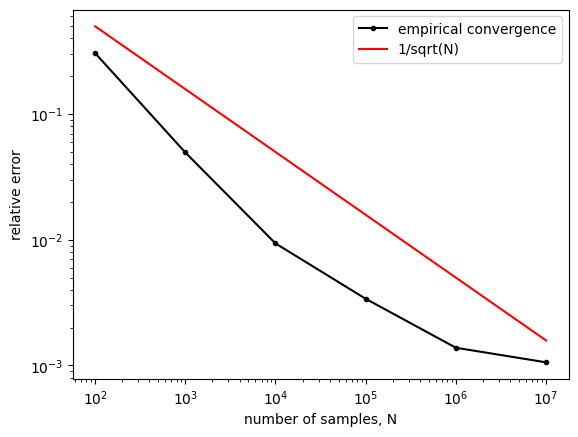

In [ ]:
np.random.seed(45)

m = 7
alpha = 0.1

G = np.random.randn(m, m)
Q = np.linalg.qr(G)[0]
A = alpha * Q
B = np.linalg.inv(np.eye(m) - A)

eps = 0.1
i = 5
j = 4

# YOUR CODE
# # # # # #

**c.** (7 pts) Try to run your code for the example proposed below. Is it working well? If not, what is the problem? Is it because $\rho(A) > 1$ or becasue $\sigma^2 = \infty$ or for some completely different reason?

In [ ]:
# test case 3

np.random.seed(41)

m = 200
alpha = 0.2

G = np.random.randn(m, m)
Q = np.linalg.qr(G)[0]
A = alpha * Q
B = np.linalg.inv(np.eye(m) - A)

eps = 0.1
i = 0
j = 4
N_walks = 50000

print("Test 3", B[i, j], MC_solver(A, i, j, N_walks, eps))

Test 3 0.010695743248596904 -123288163.31712134


**Solution:**


In [ ]:
# YOUR CODE

# # # # # #

improved stability 0.010695743248596904 -0.2460592454438646
spectral radius 0.33679319400461505
finite variance? False


## Sources

1. Method described here was proposed by J. von Neumann and S. M. Ulam and was published in [Matrix inversion by a Monte Carlo method](https://www.ams.org/journals/mcom/1950-04-031/S0025-5718-1950-0038138-X/home.html)

2. Particular formulation that I used is from [A note on the inversion of matrices by random walks](https://www.jstor.org/stable/2002546). There and in [Solving linear algebraic equations can be interesting](https://www.ams.org/journals/bull/1953-59-04/S0002-9904-1953-09718-X/) you can find more references to other methods including the ones based on [Feynman-Kac formula](https://en.wikipedia.org/wiki/Feynman%E2%80%93Kac_formula)